<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. We will be looking at customer churn in telecom business. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the data**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

**drop customerID column as it is of no use**

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Convert TotalCharges to numbers**

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() # errors=coerce will make the ' ' values as NA. isnull() will check if the value is NA(which was previously ' ')

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488].TotalCharges

' '

In [13]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [19]:
df1['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**Data Visualization**

*Numerical Features:*

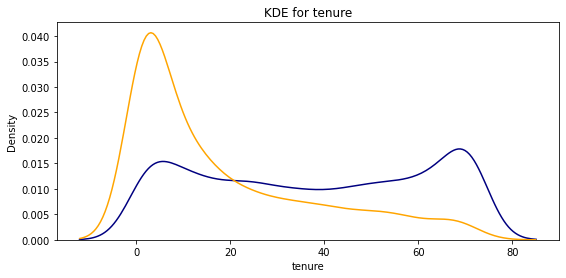

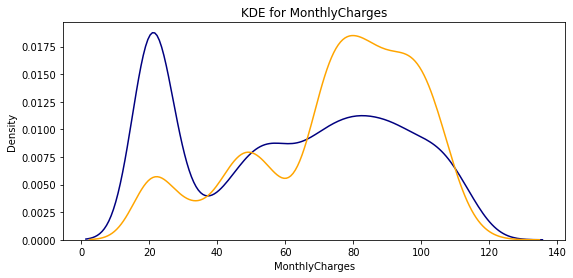

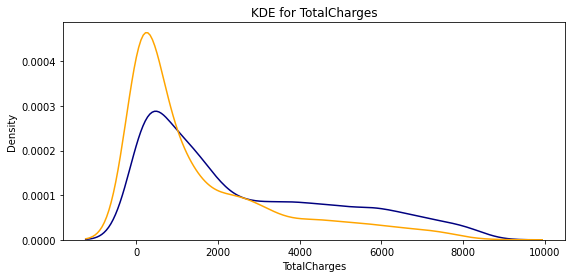

In [20]:
import seaborn as sns
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df1[df1['Churn'] == "No"][feature], color= 'navy', label= 'Churn: No') #staying
    ax1 = sns.kdeplot(df1[df1['Churn'] == "Yes"][feature], color= 'orange', label= 'Churn: Yes') #leaving
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1. Recent clients are more likely to churn out.
2. Clients with higher MonthlyCharges are also more likely to churn.
3. Tenure and MonthlyCharges are probably important features.

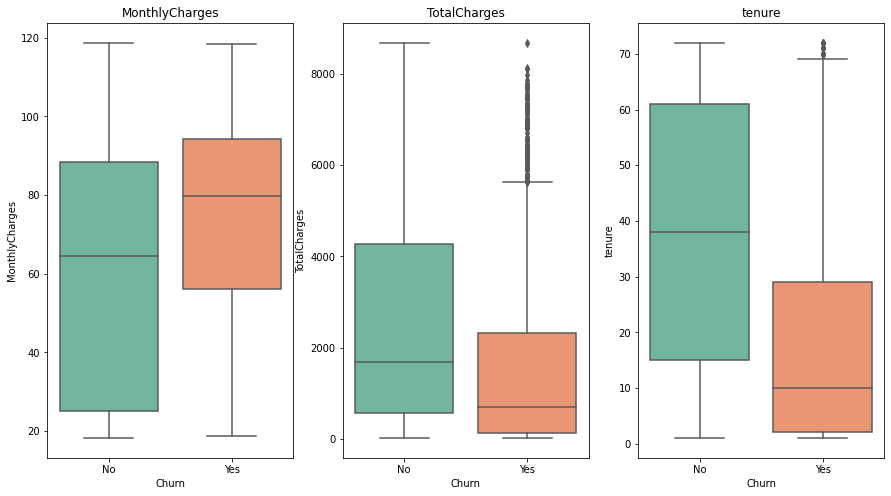

In [21]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"] #numerical columns.

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=df1["Churn"], y=df1[variable], ax=subplot, palette = "Set2").set_title(str(variable)) #distribution of data. How much part lies in 25 to 75 quartile.

1. The Monthly plan doesn't seem to be such a big driver of churn, but we can see that 75% of churners pay between 60 and 100 dollars a month
2. One important mark we can see in this plots that 50% of Churners leave the company before the first year goes by.

*Categorical Features:*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

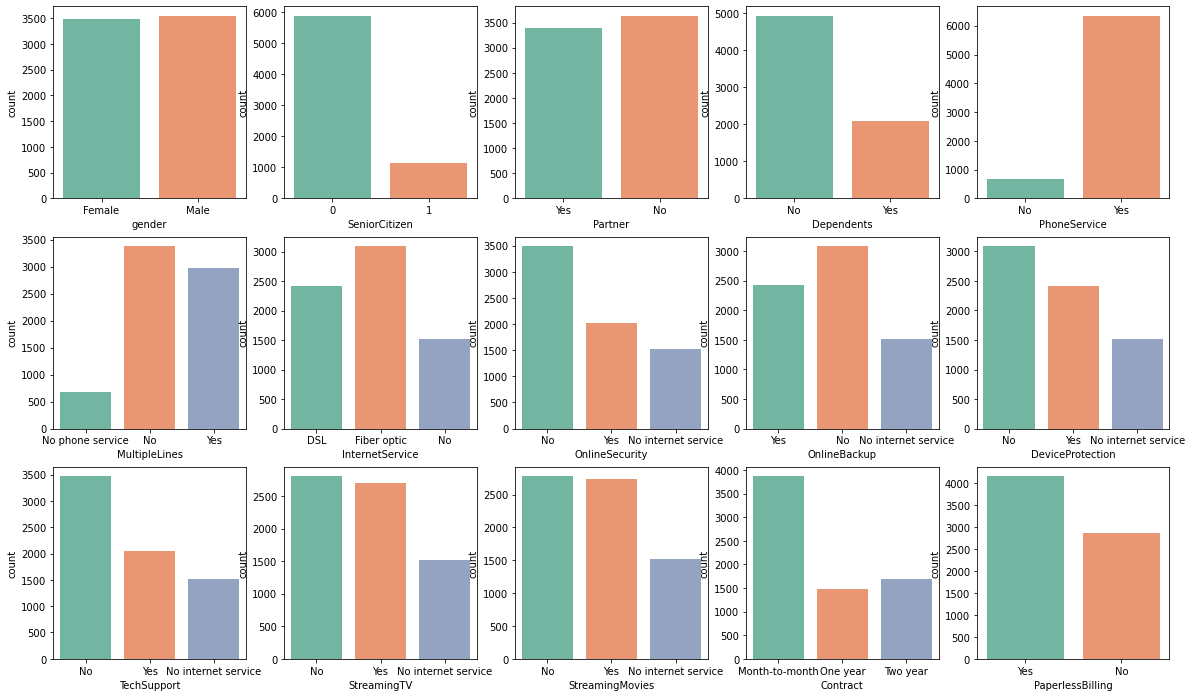

In [22]:
#visualise the distibution of data
categorical = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",'PaymentMethod']
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df1[variable], ax=subplot, palette = "Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


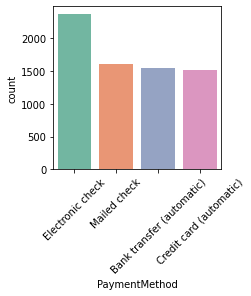

In [23]:
plt.figure(figsize=(3,3))
chart = sns.countplot(df1.PaymentMethod, palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

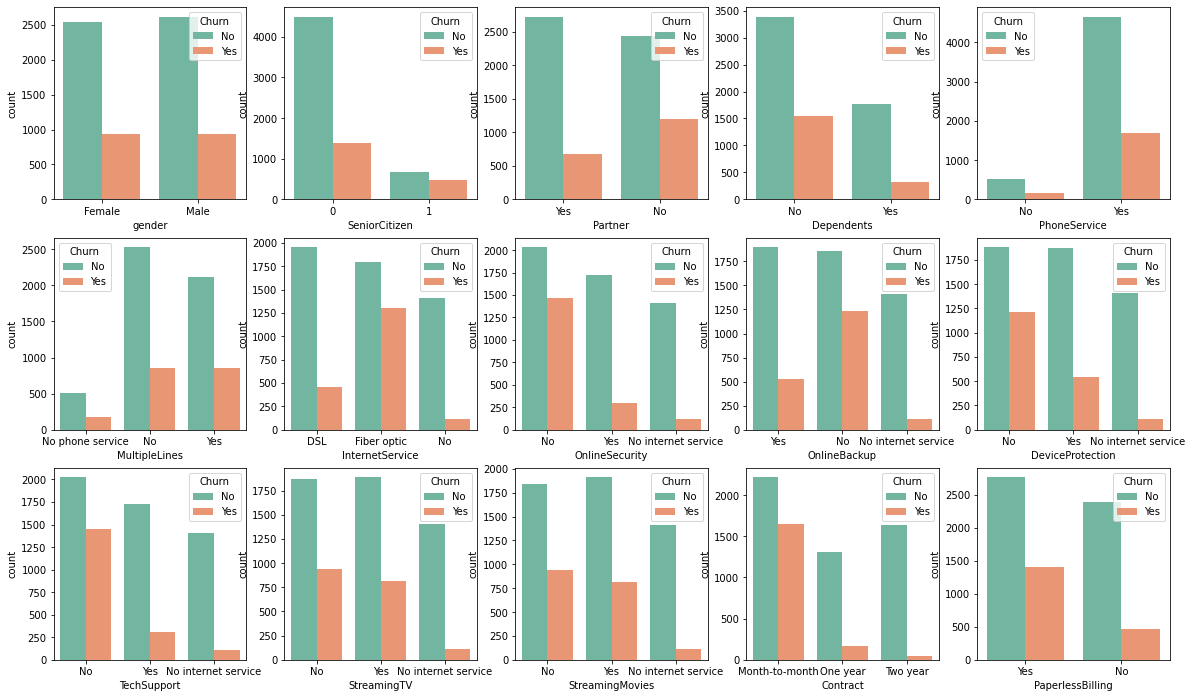

In [24]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df1[variable],hue=df1["Churn"], ax=subplot, palette = "Set2")

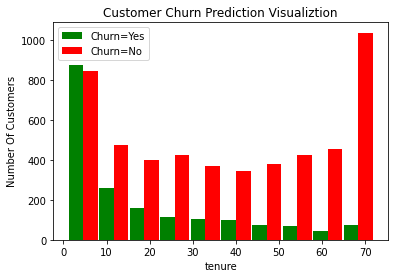

In [29]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

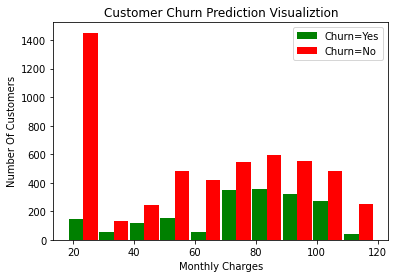

In [28]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#*Check for Outliers in Numerical Features:*

In [30]:
num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df1[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25) #25th percentile
Q3 = df_num.quantile(0.75) #75th percentile
IQR = Q3 - Q1
IQR #Middle 50%ile of the numerical data. i.e 25th to 75th percentile.
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any() 

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method.

#*Feature Engineering:*

In [31]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [32]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [33]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [34]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [35]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [36]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [37]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [38]:
df1.gender.unique()

array([1, 0])

#*One hot encoding for categorical columns:*

In [39]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6333,1,1,0,0,60,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
6884,0,0,1,0,3,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2973,1,0,1,1,62,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6600,1,0,1,1,3,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
165,0,0,1,0,69,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [41]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#*Scaling:*

In [42]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [43]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [44]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [45]:
X_train.shape

(5625, 26)

In [46]:
X_test.shape

(1407, 26)

In [47]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [48]:
len(X_train.columns)

26

#*Correlation Analysis:*

In [49]:
correlation = X_train.corr()
correlation

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.007961,-0.000087,-0.008572,-0.014896,0.009434,0.001718,0.010685,0.008660,0.001159,...,-0.008177,0.013488,-0.006755,0.015973,-0.008535,-0.010404,0.011177,-0.000263,0.001630,-0.012631
SeniorCitizen,0.007961,1.000000,0.023254,-0.210534,0.020640,0.001908,0.148141,-0.040229,0.084753,0.054675,...,-0.102836,0.252356,-0.183930,0.128463,-0.032311,-0.118144,-0.023849,-0.019239,0.180869,-0.160285
Partner,-0.000087,0.023254,1.000000,0.453625,0.376347,0.026430,0.152485,0.144226,0.137447,0.149328,...,-0.010345,0.004470,0.006523,-0.278558,0.080940,0.245864,0.105769,0.084774,-0.087338,-0.089148
Dependents,-0.008572,-0.210534,0.453625,1.000000,0.154695,0.005957,-0.019082,0.066617,0.008162,0.008788,...,0.038723,-0.164889,0.152851,-0.222259,0.054198,0.206023,0.046852,0.059669,-0.148129,0.061607
tenure,-0.014896,0.020640,0.376347,0.154695,1.000000,0.018921,0.344955,0.333592,0.364372,0.369346,...,0.011829,0.025418,-0.043988,-0.653620,0.200168,0.567184,0.240517,0.231631,-0.206698,-0.231379
PhoneService,0.009434,0.001908,0.026430,0.005957,0.018921,1.000000,0.280100,-0.078596,-0.049593,-0.065555,...,-0.448774,0.285744,0.173112,-0.013387,-0.000213,0.015708,0.011250,0.008161,-0.006030,-0.012302
MultipleLines,0.001718,0.148141,0.152485,-0.019082,0.344955,0.280100,1.000000,0.108792,0.205864,0.213865,...,-0.198283,0.367206,-0.211814,-0.109047,0.011534,0.115366,0.078101,0.070476,0.077830,-0.232866
OnlineSecurity,0.010685,-0.040229,0.144226,0.066617,0.333592,-0.078596,0.108792,1.000000,0.291561,0.286934,...,0.316694,-0.023086,-0.335807,-0.255466,0.099760,0.201261,0.099967,0.112065,-0.108662,-0.086018
OnlineBackup,0.008660,0.084753,0.137447,0.008162,0.364372,-0.049593,0.205864,0.291561,1.000000,0.318488,...,0.161527,0.166840,-0.384987,-0.169345,0.079427,0.120799,0.084224,0.094440,0.001825,-0.177068
DeviceProtection,0.001159,0.054675,0.149328,0.008788,0.369346,-0.065555,0.213865,0.286934,0.318488,1.000000,...,0.144886,0.184576,-0.387111,-0.235521,0.104059,0.174081,0.086653,0.113495,-0.011384,-0.183177


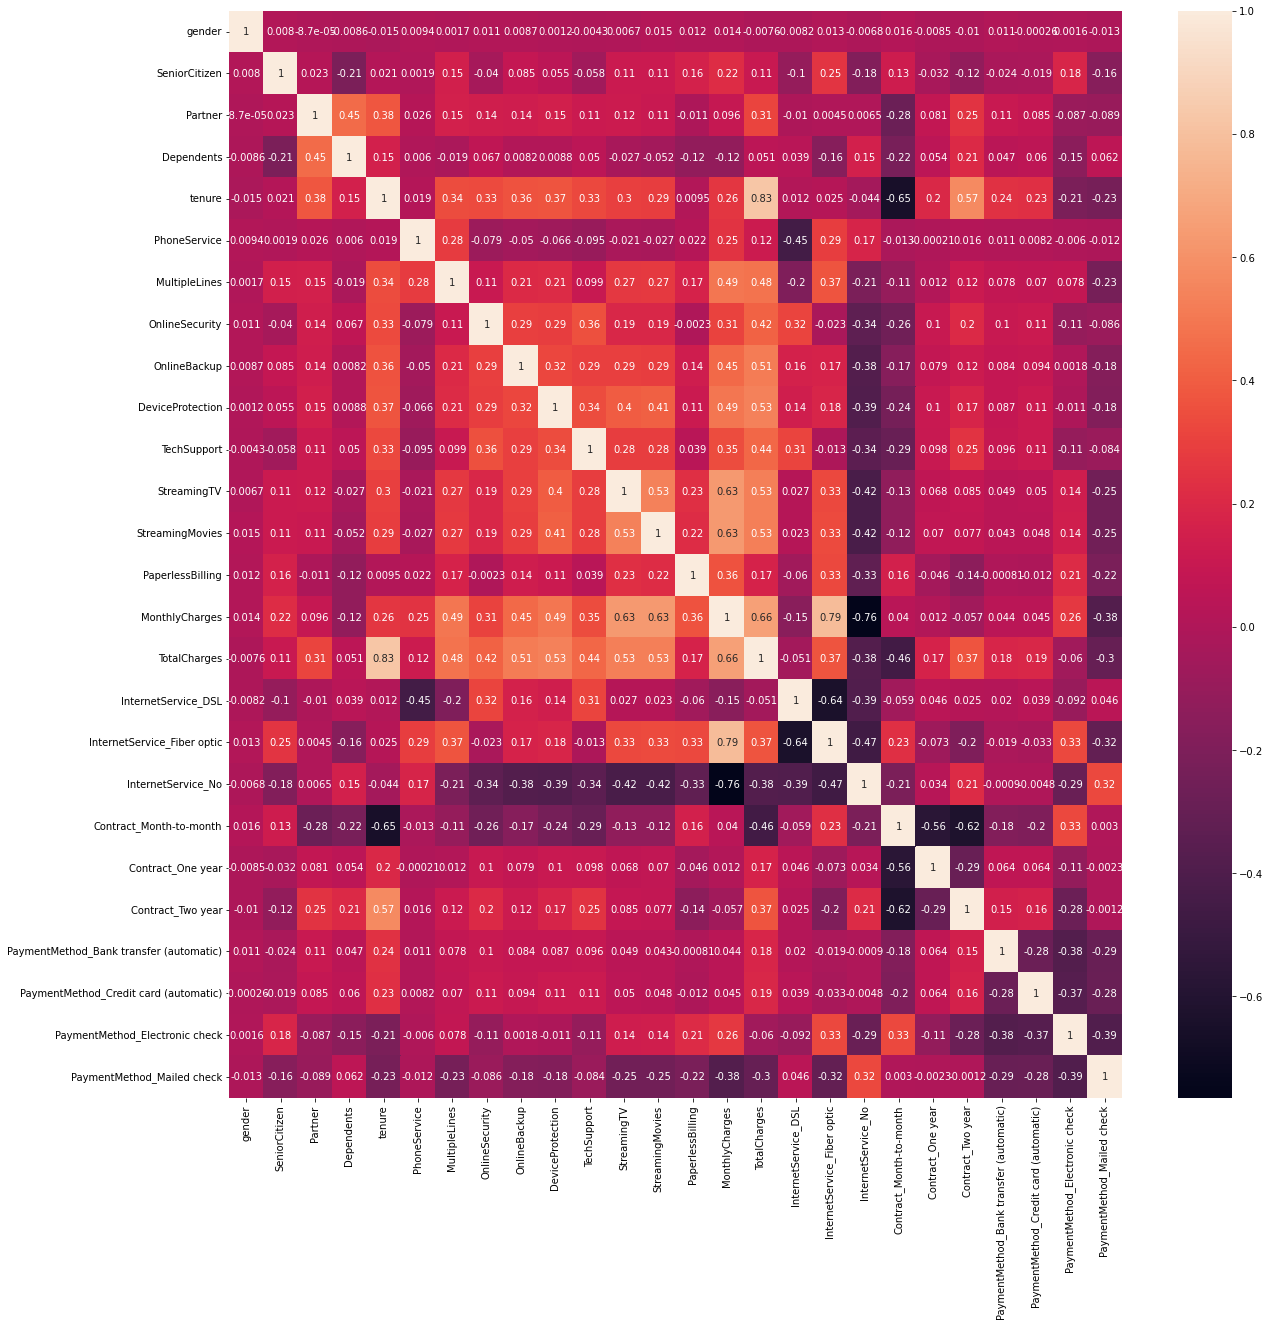

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_train.corr(), annot=True)

**Model Evaluation Metrics:**

In [51]:
#define a function that plot confusion matrix for a classifier and accuracy score
from sklearn.metrics import accuracy_score, plot_confusion_matrix


def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
                          
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy score Train: {classifier.score(X_train, y_train)}(as comparision)')
    return print("")

#*Model Building:*

*Logistic Regression:*

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

log_s=LogisticRegression()

grid={'C':10.0 **np.arange(-2,3),'penalty':['l2']}
#cv=KFold(n_splits=10,random_state=None,shuffle=False)
log_S=GridSearchCV(log_s,grid,cv=5) #n_jobs=-1,scoring='recall')
log_S.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']})

In [53]:
df_res = pd.DataFrame(log_S.cv_results_)
df_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024974,0.004995,0.002480,0.000143,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.794667,0.814222,0.796444,0.803556,0.778667,0.797511,0.011663,5
1,0.039464,0.001585,0.002499,0.000076,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.797333,0.824889,0.810667,0.806222,0.785778,0.804978,0.013095,2
2,0.080650,0.024810,0.002625,0.000104,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.796444,0.823111,0.808000,0.805333,0.790222,0.804622,0.011207,3
3,0.066524,0.004347,0.002800,0.000195,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.799111,0.824000,0.809778,0.808000,0.787556,0.805689,0.012078,1
4,0.067940,0.005111,0.002608,0.000132,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.797333,0.822222,0.807111,0.807111,0.787556,0.804267,0.011541,4


In [54]:
dir(log_S)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multim

In [55]:
log_S.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [56]:
log_S.best_score_

0.8056888888888889

In [57]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

y_pred=log_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[891 108]
 [179 229]]
0.7960199004975125
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.56      0.61       408

    accuracy                           0.80      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.79      0.80      0.79      1407



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


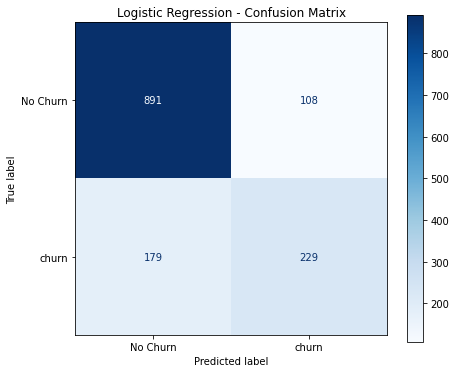

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


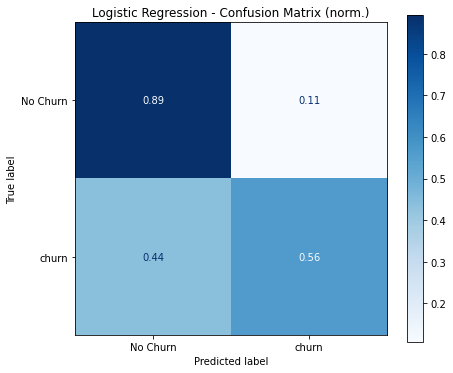

Accuracy Score Test: 0.7960199004975125
Accuracy score Train: 0.8067555555555556(as comparision)



In [58]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, log_S, y_pred,'Logistic Regression')

*Decision Tree:*

In [59]:
from sklearn.tree import DecisionTreeClassifier

param_g = {
    'max_depth': [8, 15, 30, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
    
ds=DecisionTreeClassifier()
ds = GridSearchCV(estimator = ds, param_grid = param_g, 
                          cv = 10, n_jobs = -1, verbose = 2)
ds.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 15, 30, 50], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=2)

In [60]:
df_dec = pd.DataFrame(ds.cv_results_)
df_dec

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008005,0.000586,0.002680,0.000144,8,2,3,8,"{'max_depth': 8, 'max_features': 2, 'min_sampl...",0.744227,...,0.820604,0.790409,0.765125,0.784698,0.802491,0.749110,0.749110,0.776350,0.024146,28
1,0.008605,0.002365,0.002711,0.000277,8,2,3,10,"{'max_depth': 8, 'max_features': 2, 'min_sampl...",0.765542,...,0.774423,0.776199,0.784698,0.768683,0.774021,0.766904,0.729537,0.771550,0.016136,54
2,0.006742,0.000254,0.002425,0.000200,8,2,3,12,"{'max_depth': 8, 'max_features': 2, 'min_sampl...",0.772647,...,0.806394,0.776199,0.768683,0.782918,0.786477,0.774021,0.754448,0.779905,0.014458,15
3,0.007009,0.000597,0.002638,0.000645,8,2,4,8,"{'max_depth': 8, 'max_features': 2, 'min_sampl...",0.785080,...,0.804618,0.776199,0.784698,0.786477,0.795374,0.770463,0.750890,0.783461,0.014432,9
4,0.007094,0.001242,0.002433,0.000171,8,2,4,10,"{'max_depth': 8, 'max_features': 2, 'min_sampl...",0.776199,...,0.825933,0.793961,0.768683,0.788256,0.761566,0.763345,0.779359,0.781858,0.017609,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.010157,0.003683,0.003830,0.002694,50,3,4,10,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.772647,...,0.797513,0.760213,0.781139,0.784698,0.786477,0.752669,0.734875,0.771908,0.019077,50
68,0.010143,0.002744,0.002468,0.000299,50,3,4,12,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.767318,...,0.793961,0.777975,0.797153,0.774021,0.777580,0.772242,0.756228,0.775111,0.011874,32
69,0.008913,0.000522,0.002443,0.000244,50,3,5,8,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.769094,...,0.801066,0.802842,0.774021,0.777580,0.788256,0.768683,0.754448,0.781326,0.014709,14
70,0.008530,0.001464,0.002247,0.000406,50,3,5,10,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.776199,...,0.799290,0.765542,0.775801,0.781139,0.798932,0.747331,0.752669,0.774220,0.016489,37


In [61]:
df_dec[['param_max_depth' ,'param_max_features'	,'param_min_samples_leaf'	,'param_min_samples_split', 'mean_test_score']]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score
0,8,2,3,8,0.776350
1,8,2,3,10,0.771550
2,8,2,3,12,0.779905
3,8,2,4,8,0.783461
4,8,2,4,10,0.781858
...,...,...,...,...,...
67,50,3,4,10,0.771908
68,50,3,4,12,0.775111
69,50,3,5,8,0.781326
70,50,3,5,10,0.774220


In [62]:
df_dec['mean_test_score'].sort_values(ascending=False)

16    0.786130
52    0.785420
10    0.785411
12    0.785245
17    0.784712
        ...   
27    0.766573
63    0.766404
28    0.764975
64    0.763554
66    0.761597
Name: mean_test_score, Length: 72, dtype: float64

In [63]:
ds.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [64]:
ds.best_score_

0.7861295297813568

In [65]:
y_pred_dec=ds.predict(X_test)
print(confusion_matrix(y_test,y_pred_dec))
print(accuracy_score(y_test,y_pred_dec))
print(classification_report(y_test,y_pred_dec))

[[875 124]
 [177 231]]
0.7860696517412935
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


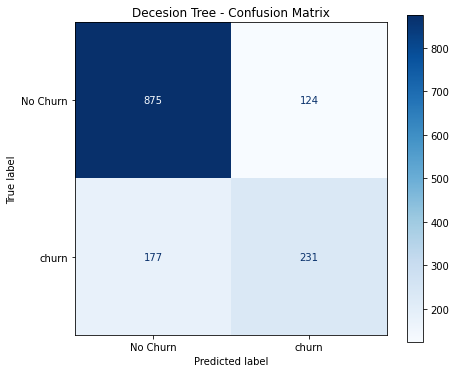

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


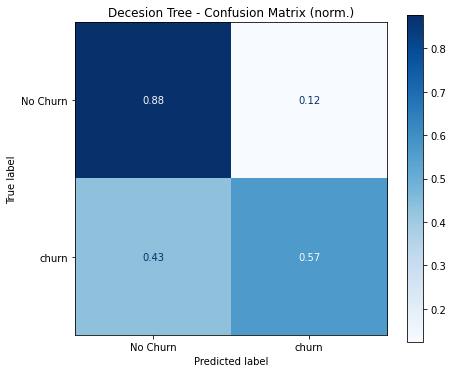

Accuracy Score Test: 0.7860696517412935
Accuracy score Train: 0.808(as comparision)



In [66]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, ds, y_pred_dec,'Decesion Tree')

*Naive Bayes:*

In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
NB=gnb.fit(X_train,y_train)

In [69]:
NB.score(X_test, y_test)

0.7491115849324804

In [68]:
y_pred_nb=NB.predict(X_test)
print(confusion_matrix(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[728 271]
 [ 82 326]]
0.7491115849324804
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       999
           1       0.55      0.80      0.65       408

    accuracy                           0.75      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.75      0.76      1407



**Artificial Neural Network Network (ANN) in tensorflow/keras:**

In [70]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 3ms/step - loss: 0.5081 - accuracy: 0.7460
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.8087
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4050 - accura

In [71]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7768


[0.48331737518310547, 0.7768301367759705]

In [72]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.30923846],
       [0.24489729],
       [0.00147808],
       [0.79393715],
       [0.66504055]], dtype=float32)

In [73]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [74]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [75]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [76]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.65      0.49      0.56       408

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

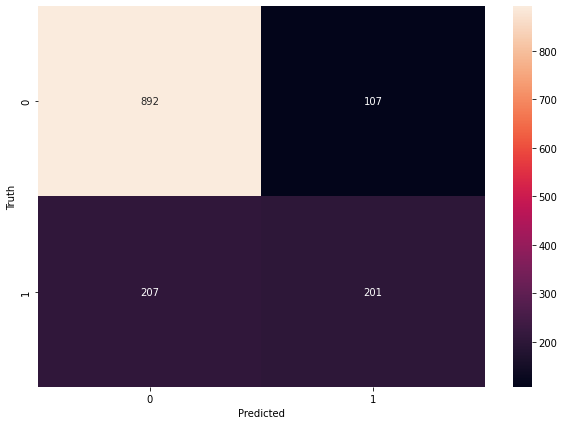

In [77]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
y_test.shape

(1407,)

**Accuracy**

In [79]:
round((862+229)/(862+229+137+179),2)

0.78

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [80]:
round(862/(862+179),2)

0.83

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [81]:
round(229/(229+137),2)

0.63

**Recall for 0 class**

In [82]:
round(862/(862+137),2)

0.86

In [83]:
round(229/(229+179),2)

0.56

#Thank You!